In [1]:
import matplotlib.pyplot as plt
import numpy as np

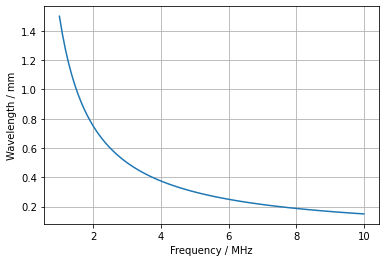

In [4]:
freq = np.linspace(1,10,100) 

plt.plot(freq, 1.5/freq)
plt.xlabel('Frequency / MHz')
plt.ylabel('Wavelength / mm')
plt.grid()

In [6]:
50/256

0.1953125